In [29]:
#import libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
browser = Browser('chrome')

In [31]:
#visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

In [32]:
#scrape the website and create a beautiful soup object
html = browser.html
temp_soup = soup(html, 'html.parser')

In [33]:
#extract all rows of data
table = temp_soup.find('table', class_='table')
table_body = table.find('tbody')
rows = table.find_all('tr')
headers = table_body.find_all('th')

In [34]:
#create an empty list
data_list= []
header_list=[]

In [35]:
#loop through the scraped data to create a list of rows
for row in rows[1:]:
    columns = row.find_all('td')
    columns = [element.text.strip() for element in columns]
    data_list.append(columns)


In [36]:
for header in headers:
    header_list.append(header.text)
print(header_list)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [37]:
#create a pandas dataframe by using the list of rows and a list of the column names
temp_df = pd.DataFrame(data_list, columns=header_list)

In [38]:
#confirm dataframe was created successfully
temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [44]:
#examine data type of each column
temp_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [58]:
#change data types for data analysis
temp_df = temp_df.astype({"id":'int64',
                          "terrestrial_date":'datetime64',
                          "sol":'int64', "ls":'int64',
                          "month":'int64',
                          "min_temp":'float64',
                          "pressure":'float64'})

In [60]:
#confirm type changes were successful
temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [62]:
#analyze the data
#how many months are there on Mars?
temp_df['month'].unique()

#There are 12 months on Mars

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [65]:
#how many martian days of data are there?
temp_df['terrestrial_date'].count()

#there are 1867 martian days of data

1867

In [70]:
#What is the average low temperature by month?
average_temp_df = temp_df.groupby("month", as_index=False)["min_temp"].mean()
average_temp_df

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


In [76]:
# Identify the coldest and hottest months in Curiosity's location
lowest_temp = average_temp_df['min_temp'].min()
lowest_temp_df = average_temp_df.loc[average_temp_df['min_temp']==lowest_temp]
lowest_temp_df
#the coldest month is month 3 with a minimum average temperature of -83.3

,month,min_temp
2,3,-83.307292


In [77]:
highest_temp = average_temp['min_temp'].max()
highest_temp_df = average_temp_df.loc[average_temp_df['min_temp']==highest_temp]
highest_temp_df
#the warmest month is month 8 with a minimum average temperature of -68.3

,month,min_temp
7,8,-68.382979


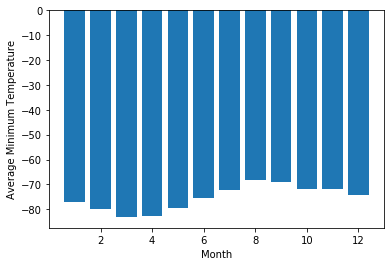

In [72]:
#plot the average temperature by month
plt.bar(average_temp_df['month'], average_temp_df['min_temp'])
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature")
plt.show()

In [78]:
#Average pressure by Martian month
average_pressure_df = temp_df.groupby("month", as_index=False)["pressure"].mean()
average_pressure_df

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


In [80]:
#lowest atmospheric pressure
lowest_pressure = average_pressure_df['pressure'].min()
lowest_pressure_df = average_pressure_df.loc[average_pressure_df['pressure']==lowest_pressure]
lowest_pressure_df
#Month 6 has the lowest atmospheric pressure 

,month,pressure
5,6,745.054422


In [82]:
#highest atmospheric pressure
highest_pressure = average_pressure_df['pressure'].max()
highest_pressure_df = average_pressure_df.loc[average_pressure_df['pressure']==highest_pressure]
highest_pressure_df
#Month 9 has the highest atmospheric pressure


,month,pressure
8,9,913.30597


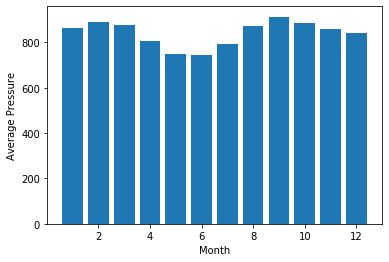

In [79]:
#plot the average pressure by month
plt.bar(average_pressure_df['month'], average_pressure_df['pressure'])
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.show()

In [98]:
#How many terrestrial (earth) days are there in a Martian Year?
min_longitude = temp_df['ls'].min()

longitude = temp_df.loc[temp_df['ls']==min_longitude]

date= longitude['terrestrial_date'].iloc[0]

next_date= longitude['terrestrial_date'].iloc[2]

difference = date - next_date
print(difference - difference - difference)


687 days 00:00:00


<function matplotlib.pyplot.show(*args, **kw)>

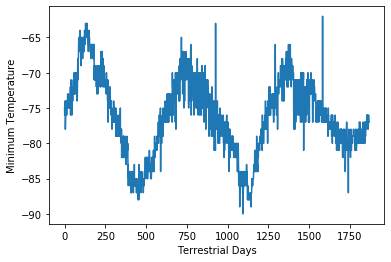

In [99]:
temp_df.min_temp.plot()
plt.xlabel("Terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.show

In [89]:
#export the cataframe to a csv file
temp_df.to_csv('mars_data.csv', index=False)

In [90]:
browser.quit()